## **Trabalho Final**
### Módulo - Programação para Data Science I

### Parte 1
##### O objetivo da parte 1 deste trabalho é a criação de um filtro Gaussiano com numpy, e a aplicação deste filtro na imagem disponibilizada no [link](https://drive.google.com/file/d/1Jrue6mVXNnx9nuk-VH2SQmF9CZUKqWV4/view).
##### Matriz do filtro: 
#####[1, 2, 1], 
#####[2, 4, 2],
#####[1, 2, 1]

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Imagem sem filtro:


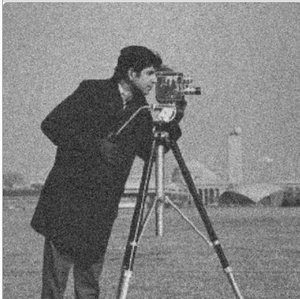

Imagem com filtro:


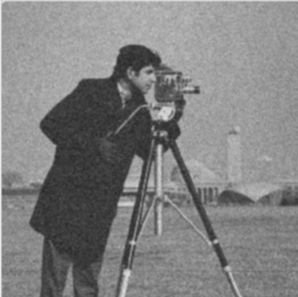

In [2]:
img = cv2.imread('imagem-com-ruido.png', 0)
print('Imagem sem filtro:')
cv2_imshow(img)

matriz = np.array([[1,2,1], [2,4,2], [1,2,1]]) / 16

def filtro(a):    
    m, n = matriz.shape
    y, x = img.shape
    y_out = y - m + 1
    x_out  = x - n + 1
    new_image = np.zeros((y_out, x_out))
    for i in range(y_out):
        for j in range(x_out):
            new_image[i][j] = np.sum(img[i:i+m, j:j+n] * matriz)
    return new_image

print('Imagem com filtro:')
cv2_imshow(filtro(img))

### Parte 2
##### Você deve utilizar o [dataset](https://www.kaggle.com/code/adaoduque/tabela-do-brasileirao-temporada-2020-2021/data?select=campeonato-brasileiro-full.csv) disponibilizado e responder aos seguintes questionamentos.
#####1) Qual o time que mais empatou em 2002 sendo visitante?
#####2) Qual time que mais venceu jogando quarta-feira?
#####3) Qual a quantidade de gols marcados por time em 2007 como mandante?
#####4) Qual a rodada que mais teve gols em 2015?
#####5) Qual foi a arena que mais sediou jogos de 2010 até 2016?

In [3]:
import pandas as pd


In [ ]:
df = pd.read_csv('campeonato-brasileiro-full.csv')
df.head()

### Ex 01 
##### Qual o time que mais empatou em 2002 sendo visitante?

In [5]:
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data'].dt.year
df = df.replace('-','Empate')

In [6]:
ano = df.query("Ano == 2002 & Vencedor == 'Empate'")
visitante = ano.groupby('Visitante').sum()
mais_empate = visitante['Ano'].argmax()
print(visitante.iloc[mais_empate].name)

Internacional


### Ex 02
##### Qual time que mais venceu jogando quarta-feira?

In [7]:
dia = df.query("Dia == 'Quarta-feira' & Vencedor != 'Empate'")
vencedor = dia.groupby('Vencedor').sum()
mais_venceu = vencedor['Ano'].argmax()
print(vencedor.iloc[mais_venceu].name)

Corinthians


### Ex 03
##### Qual a quantidade de gols marcados por time em 2007 como mandante?

In [8]:
ano = df.query('Ano == 2007')
mandante = ano.groupby('Mandante').sum().reset_index()
tabela = mandante[['Mandante', 'Mandante Placar']]
print(tabela)

         Mandante  Mandante Placar
0      América-RN               12
1    Athlético-PR               29
2     Atlético-MG               40
3     Botafogo-RJ               38
4     Corinthians               17
5        Cruzeiro               44
6     Figueirense               35
7        Flamengo               37
8      Fluminense               30
9           Goiás               32
10         Grêmio               32
11  Internacional               27
12      Juventude               25
13        Náutico               35
14      Palmeiras               27
15         Paraná               24
16         Santos               36
17          Sport               40
18      São Paulo               35
19          Vasco               43


### Ex 04
##### Qual a rodada que mais teve gols em 2015?

In [9]:
ano = df.query('Ano == 2015')
rodada = ano.groupby('Rodada').sum()
rodada['Gols'] = rodada['Mandante Placar'] + rodada['Visitante Placar']
mais_gols = rodada['Gols'].argmax()
print(rodada.iloc[mais_gols].name)

31


### Ex 05
##### Qual foi a arena que mais sediou jogos de 2010 até 2016?

In [10]:
ano = df.query('2010 <= Ano <= 2016')
arena = ano.groupby('Arena').sum()
mais_jogos = arena['Ano'].argmax()
print(arena.iloc[mais_jogos].name)

Maracanã
